https://www.kaggle.com/competitions/hubmap-hacking-the-human-vasculature

**Data Description

Your goal in this competition is to locate microvasculature structures (blood vessels) within human kidney histology slides.

The competition data comprises tiles extracted from five Whole Slide Images (WSI) split into two datasets. Tiles from Dataset 1 have annotations that have been expert reviewed. Dataset 2 comprises the remaining tiles from these same WSIs and contain sparse annotations that have not been expert reviewed.

All of the test set tiles are from Dataset 1.
Two of the WSIs make up the training set, two WSIs make up the public test set, and one WSI makes up the private test set.
The training data includes Dataset 2 tiles from the public test WSI, but not from the private test WSI.
We also include, as Dataset 3, tiles extracted from an additional nine WSIs. These tiles have not been annotated. You may wish to apply semi- or self-supervised learning techniques on this data to support your predictions.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:10]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hubmap-hacking-the-human-vasculature/sample_submission.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/tile_meta.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/wsi_meta.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/polygons.jsonl
/kaggle/input/hubmap-hacking-the-human-vasculature/test/72e40acccadf.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/2dac08665dd3.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/401cc7fbcf22.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/db4621c7226b.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/e30f64761d6b.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/9d6734304154.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/756efdf5b917.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/ee49ab2b0bf2.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/823b99840b99.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/78f336539d

In [5]:
BASE_DIR = "/kaggle/input/hubmap-hacking-the-human-vasculature"

train_files = os.listdir(os.path.join(BASE_DIR, "train"))
print(f"found {len(train_files)} files in train folder")

test_files = os.listdir(os.path.join(BASE_DIR, "test"))
print(f"found {len(test_files)} files in test folder")

found 7033 files in train folder
found 1 files in test folder


In [6]:
import matplotlib.pyplot as plt
from PIL import Image
from skimage import draw

In [7]:
tile_meta = pd.read_csv(os.path.join(BASE_DIR, "tile_meta.csv"))
wsi_meta = pd.read_csv(os.path.join(BASE_DIR, "wsi_meta.csv"))
sample_submis = pd.read_csv(os.path.join(BASE_DIR, "sample_submission.csv"))

In [8]:
tile_meta.head()

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008


In [9]:
wsi_meta.head()

,source_wsi,age,sex,race,height,weight,bmi
0,1,58,F,W,160.0,59.0,23.0
1,2,56,F,W,175.2,139.6,45.5
2,3,73,F,W,162.3,87.5,33.2
3,4,53,M,B,166.0,73.0,26.5


In [10]:
sample_submis.head()

,id,height,width,prediction_string
0,72e40acccadf,512,512,0 1.0 eNoLTDAwyrM3yI/PMwcAE94DZA==


In [11]:
#from json import load, loads

masks = pd.read_json(os.path.join(BASE_DIR, "polygons.jsonl"), lines=True)
# annotations are list of dicts where each dict has a type and coordinates which is a list of list of lists

In [12]:
masks.annotations[0]

[{'type': 'glomerulus',
  'coordinates': [[[167, 249],
    [166, 249],
    [165, 249],
    [164, 249],
    [163, 249],
    [162, 249],
    [161, 249],
    [160, 249],
    [159, 249],
    [158, 249],
    [157, 249],
    [156, 249],
    [155, 249],
    [154, 249],
    [153, 249],
    [152, 249],
    [151, 249],
    [150, 249],
    [149, 249],
    [148, 249],
    [147, 249],
    [146, 249],
    [145, 249],
    [144, 249],
    [143, 249],
    [142, 249],
    [141, 249],
    [140, 249],
    [139, 249],
    [138, 249],
    [137, 249],
    [136, 249],
    [135, 249],
    [134, 249],
    [133, 249],
    [132, 249],
    [131, 249],
    [130, 249],
    [129, 249],
    [128, 249],
    [127, 249],
    [126, 249],
    [125, 249],
    [124, 249],
    [123, 249],
    [122, 249],
    [122, 248],
    [121, 248],
    [120, 248],
    [119, 248],
    [118, 248],
    [117, 248],
    [117, 247],
    [116, 247],
    [115, 247],
    [115, 246],
    [114, 246],
    [113, 246],
    [112, 246],
    [111, 246],
 

In [34]:
# show images and annotations
def plot_img_and_mask(id, masks):
    # modified from - https://www.kaggle.com/code/thanatoz/coordinates-to-binary-mask
    
    img_name = str(id) + ".tif"
    img_path = os.path.join(BASE_DIR, "train", img_name)
    mask = masks[masks["id"] == id]

    for annotations in mask["annotations"]:
        for this_annotation in annotations:
            print(this_annotation["type"])
            if this_annotation["type"] == "glomerulus":
                color = "b"
            elif this_annotation["type"] == "blood_vessel":
                color = "r"
            elif this_annotation["type"] == "unsure":
                color = "y"
            print(this_annotation["type"])
            coords = this_annotation["coordinates"]
            x, y = np.array([i[0] for i in coords[0]]), np.array([i[1] for i in coords[0]])
            x_offset = x - np.min(x)
            y_offset = np.max(y) - y
            image = np.array(Image.open(img_path))

            draw.polygon2mask((512, 512), np.stack((y_offset, x_offset), axis=1))
            plt.scatter(x,y, s=0)
            plt.fill(x, y, color, alpha=0.5)
            plt.imshow(image, interpolation="nearest", cmap="gray")

blood_vessel
blood_vessel
blood_vessel
blood_vessel
unsure
unsure
blood_vessel
blood_vessel


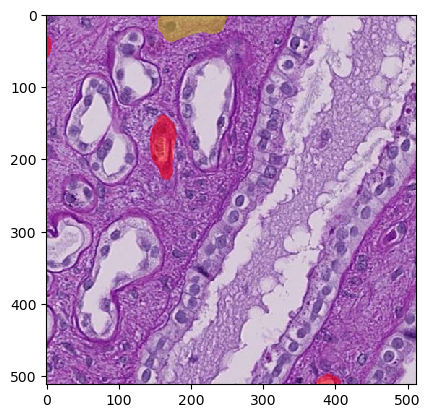

In [37]:
plot_img_and_mask(masks['id'][2], masks)
# mask = masks[masks["id"] == id]
# for annotation in mask["annotations"]:
#     print(type(annotation))

In [15]:
masks['id'][0]

'0006ff2aa7cd'

In [32]:
my_poly = np.array([(1,1), (0,0), (3,3), (1,1)])
x= draw.polygon2mask((5,5), my_poly)
x

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, False, False]])

In [61]:
masks

,id,annotations
0,0006ff2aa7cd,"[{'type': 'glomerulus', 'coordinates': [[[167,..."
1,00168d1b7522,"[{'type': 'glomerulus', 'coordinates': [[[511,..."
2,0033bbc76b6b,"[{'type': 'blood_vessel', 'coordinates': [[[16..."
3,003504460b3a,"[{'type': 'blood_vessel', 'coordinates': [[[40..."
4,004daf1cbe75,"[{'type': 'blood_vessel', 'coordinates': [[[14..."
...,...,...
1628,ff434af74304,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1629,ff4897b3eda6,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1630,ff66dec71c4c,"[{'type': 'blood_vessel', 'coordinates': [[[11..."
1631,ff99cdef0f2a,"[{'type': 'blood_vessel', 'coordinates': [[[24..."
